# Use financial criteria and probability criteria to evaluate Decision Tree model 

In [1]:
# import libraries
import pandas as pd
import warnings
import sys
import os

warnings.filterwarnings("ignore") # Ignore warnings

# Get the absolute path of the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

# Add `src` to the system path
sys.path.insert(0, src_path)

from tests.hypothesisTest import hypothesisTest
from tests.financialTest import financialTest

## Financial Test

In [3]:
df = pd.read_csv('../data/processed/VNINDEX_add_features.csv')
in_sample_total_profit, total_trade_number, win_rate, profit_factor = financialTest(df,model='DecisionTree',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns')
print(f'Total profit: {in_sample_total_profit}')
print(f'Total trade number: {total_trade_number}')
print(f'Win rate: {win_rate}')
print(f'Profit factor: {profit_factor}')

Finally capital:  2004161.0955166647
The model helps us to get profit
The win rate is higher than 0.5 and lower than 0.8
The profit factor is higher than 1, that's good
Total profit: 4161.0955166646745
Total trade number: 206
Win rate: 0.5145631067961165
Profit factor: 1.231550400040507


## Hypothesis Test

In [4]:
data = []
for i in range(100):
    df = pd.read_csv(f'../data/processed/out_of_sample_{i+1}.csv')
    data.append(df)
total_profit_list = hypothesisTest(data,model='DecisionTree',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns',financial_feature='total_profit')
total_profit_list = [float(total_profit) for total_profit in total_profit_list]
print(f'Total profit list: {total_profit_list}')

Finally capital:  2000001.8158329441
Finally capital:  1997860.098482191
Finally capital:  2002638.2996055458
Finally capital:  1998787.631098686
Finally capital:  1998042.3589792142
Finally capital:  2001169.331352412
Finally capital:  1999385.427262972
Finally capital:  1997540.6443968397
Finally capital:  2006102.3975357045
Finally capital:  2001449.1147688536
Finally capital:  1996296.3611736167
Finally capital:  2001159.0274719908
Finally capital:  1998717.1068251801
Finally capital:  1995965.887014184
Finally capital:  2001765.9481458005
Finally capital:  1994648.8628138225
Finally capital:  1991231.2191563975
Finally capital:  2003156.7555573783
Finally capital:  2003221.0343701025
Finally capital:  2004366.536813971
Finally capital:  2003914.6361673172
Finally capital:  1998719.1351157785
Finally capital:  2002591.9844168688
Finally capital:  2003111.1140409056
Finally capital:  2003412.6763863415
Finally capital:  2001497.3860323925
Finally capital:  2004177.2142280522
Finally

# Plot data to compare between LinearRegression, DecisionTree, RandomForest

DecisionTree profit 4161.096 lies in the right tail of the distribution.
p-value: 0.070
Since p-value < 0.1, we reject H0. The strategy likely outperformed that monkey.
LinearRegression profit -9132.414 lies in the left tail of the distribution.
p-value: 1.000
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.
RandomForest profit 2729.838 lies in the center of the distribution.
p-value: 0.230
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.


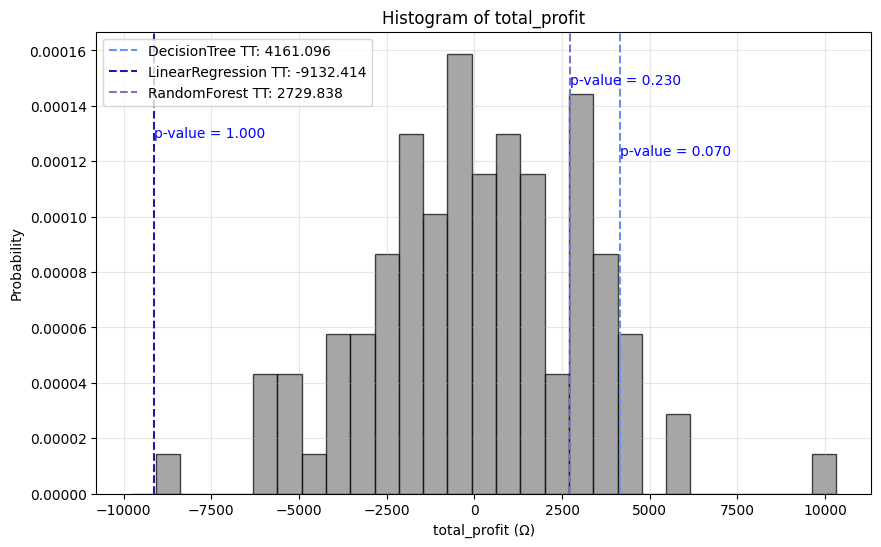

In [5]:
from visualization.histogram import plot_histogram
plot_histogram(total_profit_list,{'DecisionTree':in_sample_total_profit,'LinearRegression':-9132.414043806493,'RandomForest':2729.837818058906})